In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
#imports 
from src.preprocessing import *
from src.models import *
from src.train_eval_helpers import *
from src.plots import *
%load_ext autoreload
%autoreload 2
#checking gpu status

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 180
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

In [4]:
models = load_models(PATH='../output/training_output/richie_minmax_kfold/', arch='richie')
train, val, acc, auc, f1 = load_losses(PATH='../output/training_output/richie_minmax_kfold/dicts')

Models & weights loaded
Values loaded


In [7]:
train_df = pd.DataFrame.from_dict(train, orient='columns')#, dtype=None, columns=None)
#train_df['epoch']=range(0,500)
val_df = pd.DataFrame.from_dict(val, orient='columns')#, dtype=None, columns=None)
#val_df['epoch']=range(0,500)
#train_melt = train_df.melt(id_vars='epoch',var_name='seqlen', value_name ='train_loss')
#train_melt.merge(val_melt, on ='epoch')

In [8]:
train_df

,12,13,14,15,16
0,"[0.8075151851302699, 0.8045885217817206, 0.794...","[0.7536014501865094, 0.7535348855532132, 0.746...","[0.8109986875571457, 0.791233573474136, 0.7804...","[0.8285677405290826, 0.8180912344954735, 0.791...","[0.8137635555532243, 0.8196080293920305, 0.780..."
1,"[0.8291587986444172, 0.8051010338883651, 0.797...","[0.8145414988199869, 0.789541360659477, 0.7832...","[0.7676601246291516, 0.748105014071745, 0.7309...","[0.7547030587529027, 0.7413790128951849, 0.731...","[0.8216783437463973, 0.7914887799157037, 0.775..."
2,"[0.7919519324051706, 0.7825272177395067, 0.768...","[0.7823851628181262, 0.764156848956377, 0.7579...","[0.7794476268338222, 0.7611931842916152, 0.745...","[0.8088493000629337, 0.7683820987856665, 0.754...","[0.7996895346376631, 0.7651691238085429, 0.743..."


In [146]:
a = []
e = []
for k in [12,13,14,15,16]:
    a+= [k]*500
    e+= range(500)
    
blank = pd.DataFrame( data = {'epoch':e,'seqlen':a} ,columns=['epoch','seqlen'])
x=pd.merge(blank, val_melt, left_index=True, right_index=True, suffixes=('', '_delme'))
x = x[[c for c in x.columns if not c.endswith('_delme')]]


In [9]:
from src.plots import *
loss_df = get_losses_df(PATH='../output/training_output/richie_minmax_kfold/dicts')

Values loaded


In [10]:
loss_df

,epoch,seqlen,value,type
0,0,12,"[0.8075151851302699, 0.8045885217817206, 0.794...",train_loss
1,1,12,"[0.8291587986444172, 0.8051010338883651, 0.797...",train_loss
2,2,12,"[0.7919519324051706, 0.7825272177395067, 0.768...",train_loss
3,0,13,"[0.7536014501865094, 0.7535348855532132, 0.746...",train_loss
4,1,13,"[0.8145414988199869, 0.789541360659477, 0.7832...",train_loss
...,...,...,...,...
10,1,15,"[0.19627749576988154, 0.5379282218597065, 0.55...",val_f1
11,2,15,"[0.6091213604741046, 0.5786042944785276, 0.577...",val_f1
12,0,16,"[0.0, 0.08559201141226817, 0.26782393056416615...",val_f1
13,1,16,"[0.0, 0.012012012012012012, 0.3820754716981132...",val_f1


In [170]:
import seaborn as sns
#sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")
display(dots.sample(5))
# Plot the lines on two facets
#sns.relplot(
#    data=dots,
#    x="time", y="firing_rate",
#    hue="coherence", size="choice", col="align",
#    kind="line", size_order=["T1", "T2"], palette=palette,
#    height=5, aspect=.75, facet_kws=dict(sharex=False),
#)

,align,choice,time,coherence,firing_rate
576,sacc,T1,180,0.0,14.442231
460,sacc,T1,-220,3.2,51.462516
692,sacc,T2,-200,0.0,42.191964
64,dots,T1,120,25.6,29.696673
19,dots,T1,-20,3.2,31.101190


In [213]:
copy = loss_df.copy()
copy['value'] = copy['value']+0.05


In [ ]:
xd = loss_df.copy()
for x in [0.05,-0.05, -0.03, 0.03]:
    copy = loss_df.copy()
    copy['value'] = copy['value']+0.05
    xd = pd.concat([copy,xd])

In [11]:
sns.set_palette(sns.color_palette('coolwarm', n_colors=2))
grid = sns.relplot(data=xd.query('type=="train_loss" or type=="val_loss"'),
            x='epoch', y='value',hue='type',legend=None,
            kind='line',col='seqlen', col_wrap=3)
grid.axes[0].legend(['train','val'],loc='best')
grid.axes.title(['test1','test2','test3','test4','test5'])

NameError: name 'xd' is not defined

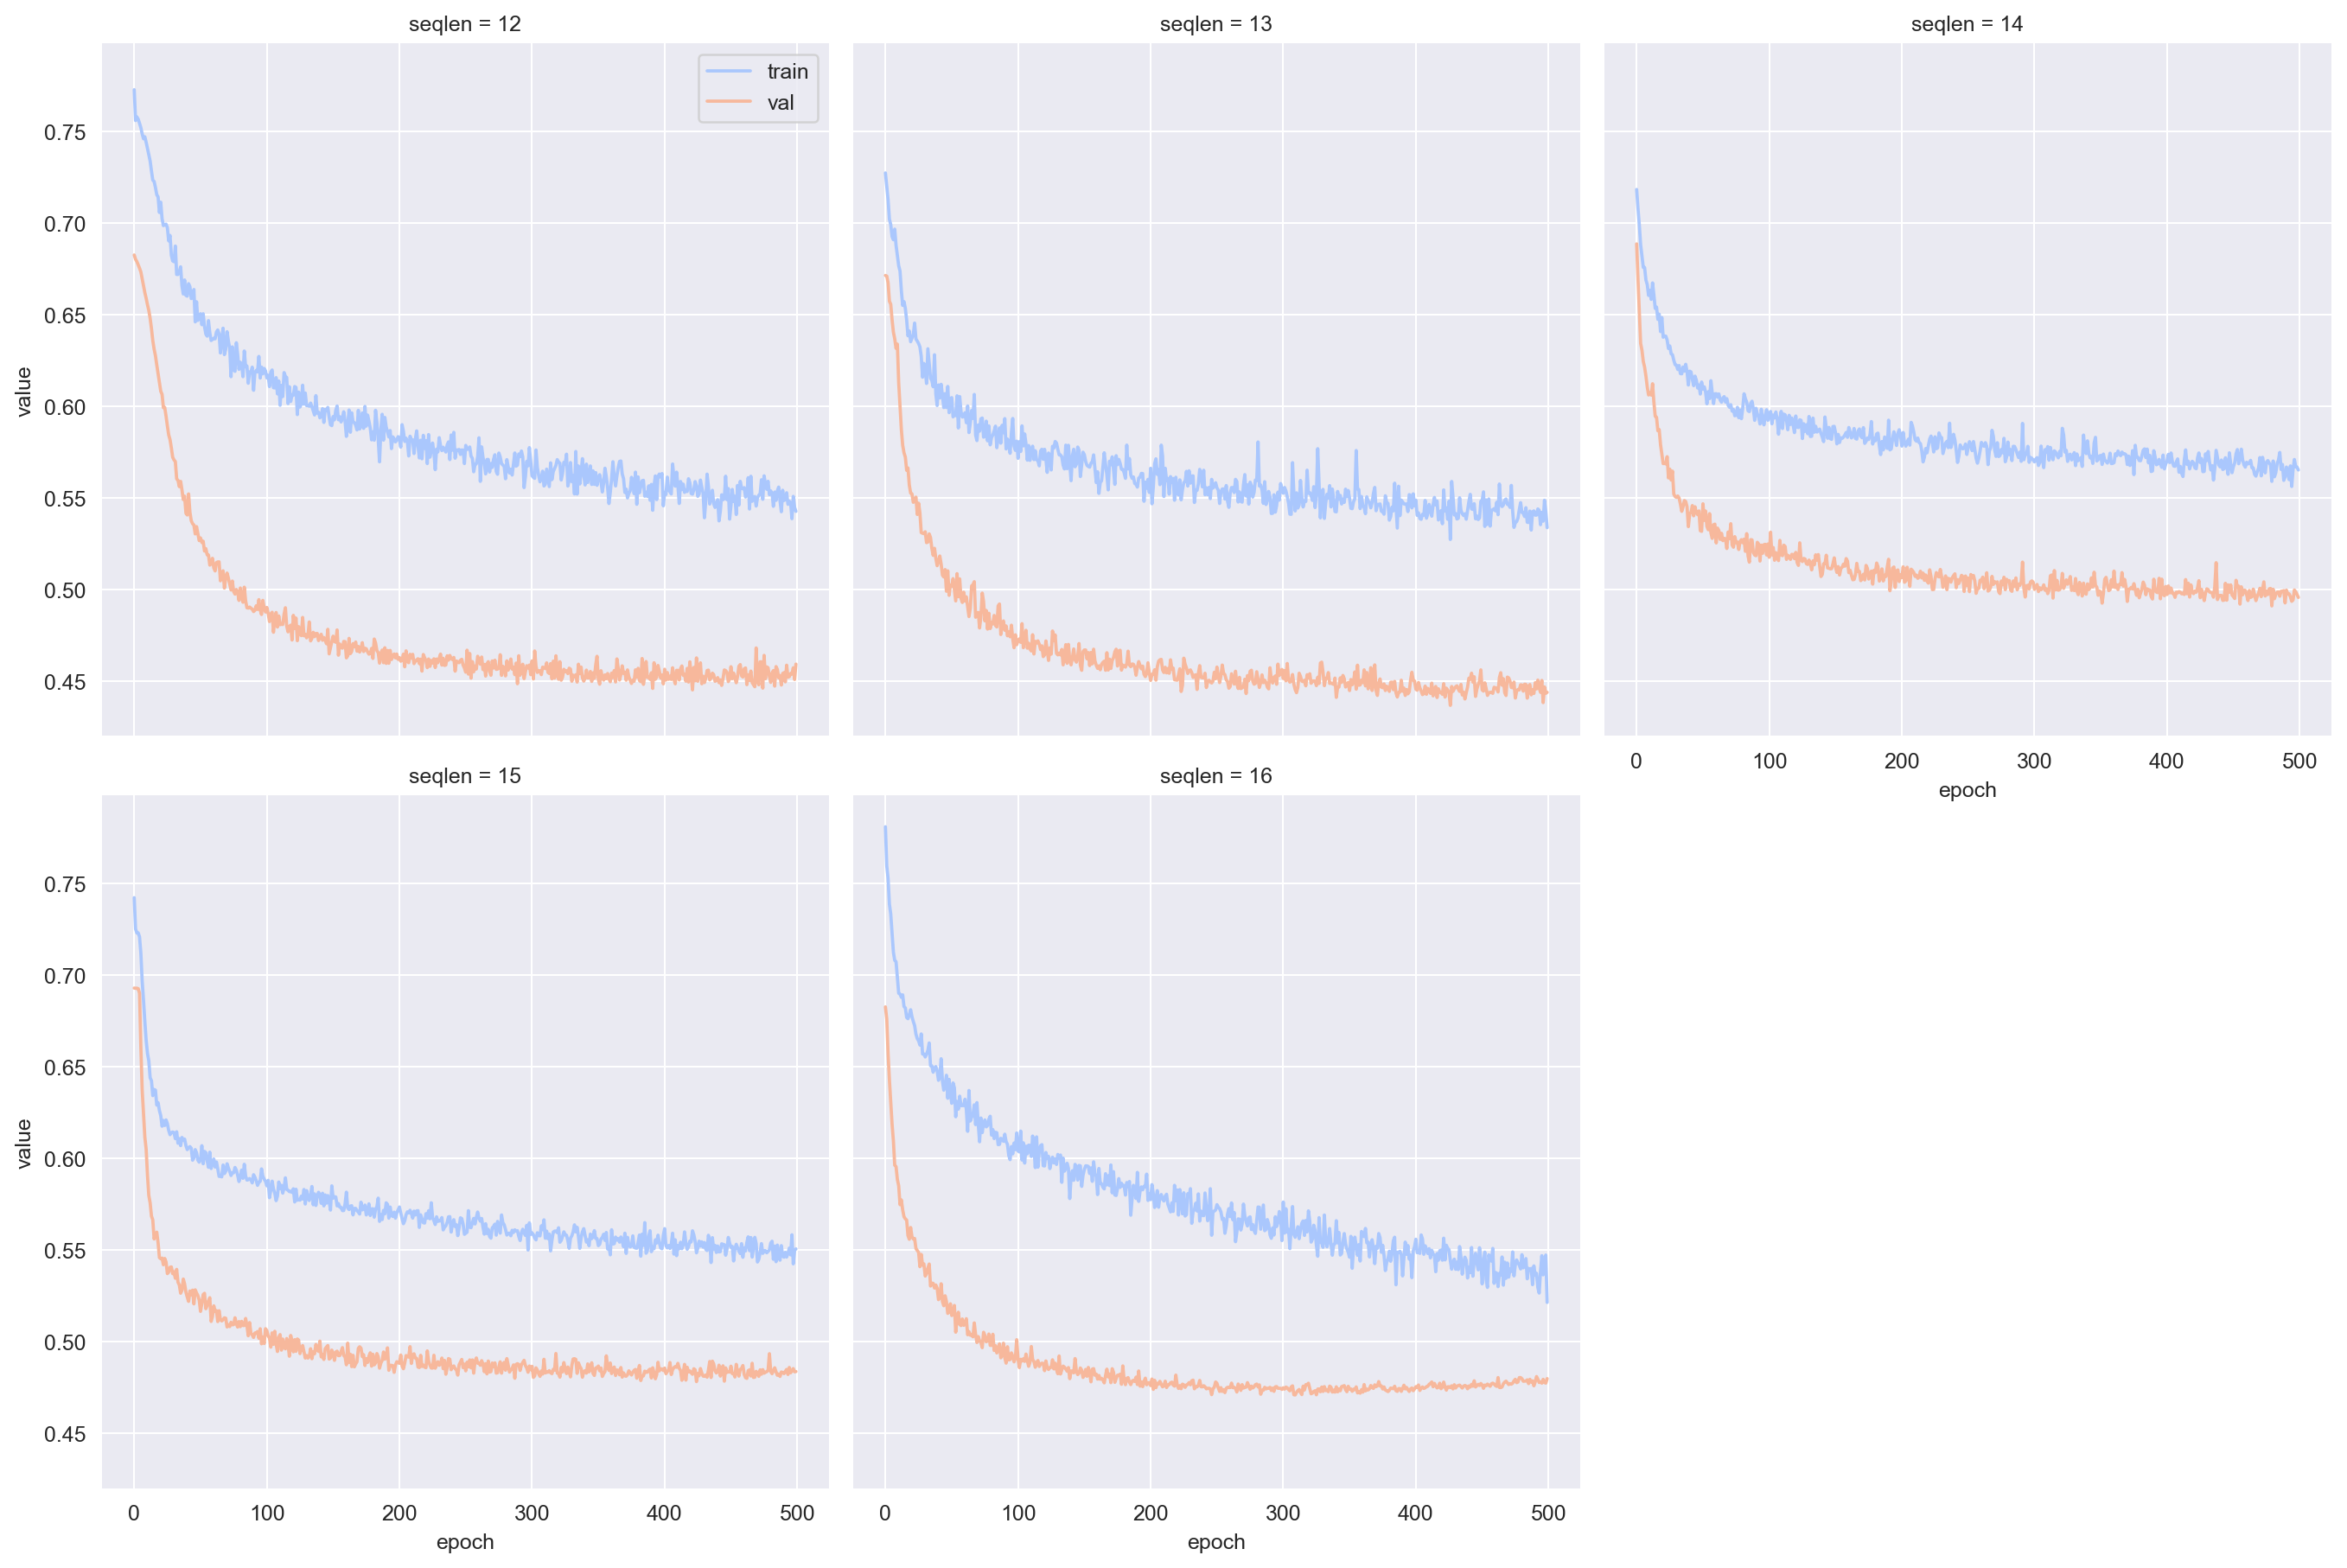

In [211]:
sns.set_palette(sns.color_palette('coolwarm', n_colors=2))
grid = sns.relplot(data=loss_df.query('type=="train_loss" or type=="val_loss"'),
            x='epoch', y='value',hue='type',legend=None,
            kind='line',col='seqlen', col_wrap=3)
grid.axes[0].legend(['train','val'],loc='best')

#g_rel.set_axis_labels("Period","Mean (relative) pageviews");
#g_rel.set_xticklabels(["Period before \n quarantine start","Period after \n quarantine start" ],size="small")
#g_rel.set_titles(col_template = "{col_name}",weight=535,size="small");
#g_rel.fig.tight_layout(w_pad=1.1);
#plt.subplots_adjust(top=0.95);
#g_rel.fig.suptitle('Mean (relative) daily pageviews for each topic \n during a given period of 35 days with respect to quarantine start',
#                  fontsize='x-large',weight=575);